In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [ ]:
# Import Important Libraries
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow

In [ ]:
# Import Mediapipe libraries
import mediapipe as mp
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [ ]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

In [ ]:
# Function to process an image
def draw_landmarks(image_path):
  image = cv2.imread(image_path)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  results = hands.process(image_rgb)

  # Draw landmarks
  if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
      mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
  return image

In [ ]:
def extract_landmarks(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)

    indices_to_extract = [0, 1, 2, 5, 9, 13, 17]
    landmark_names = {
        0: 'wrist',
        1: 'thumb_cmc',
        2: 'thumb_mcp',
        5: 'index_finger_mcp',
        9: 'middle_finger_mcp',
        13: 'ring_finger_mcp',
        17: 'pinky_mcp',
    }
    # indices_to_extract = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
    # landmark_names = {
    #       0: 'wrist',
    #       1: 'thumb_cmc',
    #       2: 'thumb_mcp',
    #       3: 'thumb_ip',
    #       4: 'thumb_tip',
    #       5: 'index_finger_mcp',
    #       6: 'index_finger_pip',
    #       7: 'index_finger_dip',
    #       8: 'index_finger_tip',
    #       9: 'middle_finger_mcp',
    #       10: 'middle_finger_pip',
    #       11: 'middle_finger_dip',
    #       12: 'middle_finger_tip',
    #       13: 'ring_finger_mcp',
    #       14: 'ring_finger_pip',
    #       15: 'ring_finger_dip',
    #       16: 'ring_finger_tip',
    #       17: 'pinky_mcp',
    #       18: 'pinky_pip',
    #       19: 'pinky_dip',
    #       20: 'pink_tip'
    # }

    landmarks_data = []
    if results.multi_hand_landmarks:
        num_hands = min(2, len(results.multi_hand_landmarks))  # Maximum 2 hands
        for hand_idx in range(num_hands):
            landmarks = {}
            hand_landmarks = results.multi_hand_landmarks[hand_idx]
            for idx, landmark in enumerate(hand_landmarks.landmark):
                if idx in indices_to_extract:
                    landmark_name = landmark_names[idx]
                    landmarks[f'hand_{hand_idx}_{landmark_name}'] = {
                        'X': landmark.x,
                        'Y': landmark.y,
                        'Z': landmark.z if hasattr(landmark, 'z') else None
                    }
            landmarks_data.append(landmarks)
    return landmarks_data

###**Trial 1 Comparison**

Trial 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
trial2_inc = '/content/drive/MyDrive/PD TESTING/Incorrect/Trials/TestB_Trial4.png'


In [ ]:
test_inc2_landmarks = extract_landmarks(trial2_inc)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
import pandas as pd
incorrect_trial2_data = []
for hand_idx, hand_landmarks in enumerate(test_inc2_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    first_trial2_data = pd.DataFrame(data)
    first_trial2_data['Hand'] = hand_idx
    trial2_data = incorrect_trial2_data.append(first_trial2_data)

inc_trial2_data = pd.concat(incorrect_trial2_data, ignore_index=True)
print("Incorrect Hand Posture Trial 4 (Test B)")
inc_trial2_data

Incorrect Hand Posture Trial 3 (Test B)


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.821809,0.309333,6.369373e-07,0
1,hand_0_thumb_cmc,0.762423,0.365248,-4.490760e-02,0
2,hand_0_thumb_mcp,0.737955,0.448739,-6.873095e-02,0
3,hand_0_index_finger_mcp,0.826904,0.502000,-7.354412e-02,0
4,hand_0_middle_finger_mcp,0.870320,0.501924,-5.270708e-02,0
5,hand_0_ring_finger_mcp,0.896215,0.494147,-3.232959e-02,0
6,hand_0_pinky_mcp,0.910103,0.481267,-1.477485e-02,0
7,hand_1_wrist,0.442938,0.305116,-1.702052e-09,1
8,hand_1_thumb_cmc,0.520559,0.344443,-2.549645e-02,1
9,hand_1_thumb_mcp,0.567000,0.425603,-4.812495e-02,1


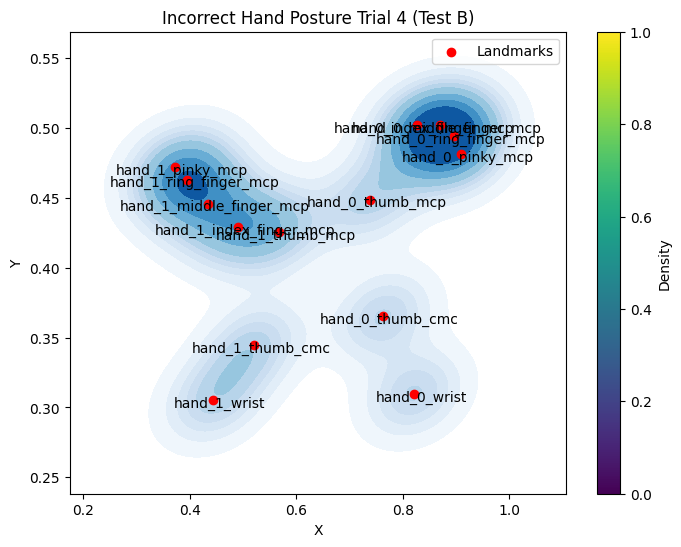

In [ ]:
# XY Coordinates
plt.figure(figsize=(8, 6))
kde = sns.kdeplot(x=inc_trial2_data['X'], y=inc_trial2_data['Y'], fill=True, cmap="Blues", bw_adjust=0.5)
plt.scatter(inc_trial2_data['X'], inc_trial2_data['Y'], color='red', label='Landmarks')

# Annotate points
for i, landmark in enumerate(inc_trial2_data['Landmark']):
    plt.annotate(landmark, (inc_trial2_data['X'][i], inc_trial2_data['Y'][i]), textcoords="offset points", xytext=(5,-5), ha='center')

colorbar = plt.colorbar(kde.collections[0], ax=kde.axes)
colorbar.set_label('Density')

plt.title('Incorrect Hand Posture Trial 4 (Test B)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Sample Dataset

In [ ]:
sample_incorrect2 = '/content/drive/MyDrive/PD TESTING/Incorrect/Dataset/Dataset4.jpg'
sample_incorrect2_landmarks = extract_landmarks(sample_incorrect2)

In [ ]:
sample_incorrect2_data = []
for hand_idx, hand_landmarks in enumerate(sample_incorrect2_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    sample_trial2_data = pd.DataFrame(data)
    sample_trial2_data['Hand'] = hand_idx
    sample2_data = sample_incorrect2_data.append(sample_trial2_data)

inc_sample2_data = pd.concat(sample_incorrect2_data, ignore_index=True)
print("Incorrect Hand Posture from the Dataset")
inc_sample2_data

Incorrect Hand Posture from the Dataset


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.733196,0.261443,7.452623e-07,0
1,hand_0_thumb_cmc,0.656173,0.304628,-2.286727e-02,0
2,hand_0_thumb_mcp,0.618638,0.408780,-3.449516e-02,0
3,hand_0_index_finger_mcp,0.679526,0.526032,-5.034951e-02,0
4,hand_0_middle_finger_mcp,0.731476,0.530423,-3.655016e-02,0
5,hand_0_ring_finger_mcp,0.769228,0.511863,-2.158541e-02,0
6,hand_0_pinky_mcp,0.794396,0.481529,-7.650332e-03,0
7,hand_1_wrist,0.372050,0.288302,3.228653e-07,1
8,hand_1_thumb_cmc,0.454214,0.323263,-1.176001e-02,1
9,hand_1_thumb_mcp,0.496702,0.431569,-2.216771e-02,1


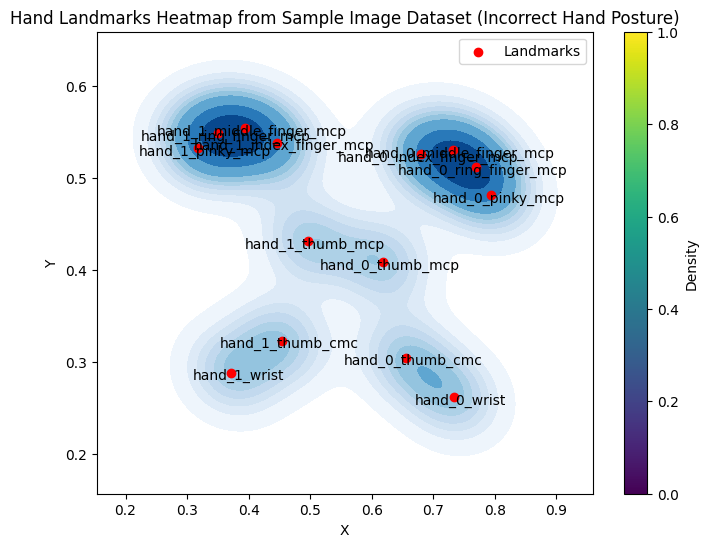

In [ ]:
plt.figure(figsize=(8, 6))
kde = sns.kdeplot(x=inc_sample2_data['X'], y=inc_sample2_data['Y'], fill=True, cmap="Blues", bw_adjust=0.5)
plt.scatter(inc_sample2_data['X'], inc_sample2_data['Y'], color='red', label='Landmarks')

# Annotate points
for i, landmark in enumerate(inc_sample2_data['Landmark']):
    plt.annotate(landmark, (inc_sample2_data['X'][i], inc_sample2_data['Y'][i]), textcoords="offset points", xytext=(5,-5), ha='center')

colorbar = plt.colorbar(kde.collections[0], ax=kde.axes)
colorbar.set_label('Density')

plt.title('Hand Landmarks Heatmap from Sample Image Dataset (Incorrect Hand Posture)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()